In [1]:
import pandas as pd
from dataclasses import dataclass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
def show_null_columns_values(df):
    columns_null_values = {}
    for column in df.columns:
        columns_null_values[column] = len(df[df[column].isna()])
        
    print(f"Total records in DataFrame: {df.shape[0]}")
    print(f"Records left if we drop ones with null values: {df.dropna().shape[0]}")
    
    return columns_null_values


In [3]:
df = pd.read_csv("./data/weatherAUS.csv", parse_dates=["Date"]) \
        .sort_values(["Location", "Date"]) \
        .reset_index(drop=True)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,W,13.0,15.0,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,No
1,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,SW,13.0,15.0,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,No,No
2,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,SW,2.0,11.0,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,No,No
3,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,NE,6.0,13.0,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,No,No
4,2008-07-05,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,NE,9.0,9.0,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,No,NaN


# Handling wind direction

We will convert the categorical values to degrees, so that they can be used for interpolation and other numerical processing.

In [5]:
wind_dir_to_deg = {
    "E": 0,
    "ENE": 22.5,
    "NE": 45,
    "NNE": 67.5,
    "N": 90,
    "NNW": 112.5,
    "NW": 135,
    "WNW": 157.5,
    "W": 180,
    "WSE": 202.5,
    "SE": 225,
    "SSE": 247.5,
    "S": 270,
    "SSW": 292.5,
    "SW": 315,
    "ESW": 337.5
}

In [6]:
[column for column in df.columns if "Dir" in column]

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [7]:
df['WindGustDir'].unique()

array(['NW', 'SW', 'W', 'NNE', 'N', 'NNW', 'WSW', 'WNW', 'SSE', 'ENE',
       'SSW', nan, 'ESE', 'SE', 'NE', 'E', 'S'], dtype=object)

In [8]:
for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df[column] = df[column].map(wind_dir_to_deg)

# Extract latitude and longitude from Location
We will add latitude and longitude features to the dataset, so that they can be used as coordinates by the newral network.

In [9]:
np.array(sorted(df["Location"].unique()))

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype='<U16')

In [10]:
# Used resource: https://www.latlong.net/category/cities-14-15.html
# https://www.distancesfrom.com/cobar-latitude-longitude-cobar-latitude-cobar-longitude/LatLongHistory/2360307.aspx
# Google Maps
@dataclass
class Location:
    latitude: float
    longitude: float
        
city_to_location = {
    "Adelaide": Location(-34.921230, 138.599503),
    "Albany": Location(-35.022778, 117.881386),
    "Albury": Location(-36.080780, 146.916473),
    "AliceSprings": Location(-23.700552, 133.882675),
    "BadgerysCreek": Location(-33.8877, 150.7405),
    "Ballarat": Location(-37.549999, 143.850006),
    "Bendigo": Location(-36.757786, 144.278702),
    "Brisbane": Location(-27.4709, 153.0235),
    "Cairns": Location(-16.925491, 145.754120),
    "Canberra": Location(-35.282001, 149.128998),
    "Cobar": Location(-31.498, 145.8382),
    "CoffsHarbour": Location(-30.296276, 153.114136),
    "Dartmoor": Location(-37.9220101262417, 141.27523291130055),
    "Darwin": Location(-12.462827, 130.841782),
    "GoldCoast": Location(-28.016666, 153.399994),
    "Hobart": Location(-42.882411662207495, 147.3257213571276),
    "Katherine": Location(-14.463921, 132.266073),
    "Launceston": Location(-41.429825, 147.157135),
    "Melbourne": Location(-37.840935, 144.946457),
    "MelbourneAirport": Location(-37.67044310324932, 144.84312781122995),
    "Mildura": Location(-34.206841, 142.136490),
    "Moree": Location(-29.470924186165387, 149.84305326044594),
    "MountGambier": Location(-37.824429, 140.783783),
    "MountGinini": Location(-35.528580398633785, 148.77180649515086),
    "Newcastle": Location(-32.91781100654264, 151.78032800603768),
    "Nhil": Location(-36.303073017786005, 141.60284948845933),
    "NorahHead": Location(-33.2816447023759, 151.56588224092252),
    "NorfolkIsland": Location(-29.032342565005322, 167.9483944863417),
    "Nuriootpa": Location(-34.46433816685157, 138.9836132854175),
    "PearceRAAF": Location(-31.667465073033465, 116.02931799942259),
    "Penrith": Location(-33.758011, 150.705444),
    "Perth": Location(-31.953512, 115.857048),
    "PerthAirport": Location(-31.938447429902652, 115.96684150182722),
    "Richmond": Location(-33.60348746998354, 150.74494325647916),
    "Sale": Location(-38.099998, 147.066666),
    "SalmonGums": Location(-32.87138325138548, 121.61185659497471),
    "Sydney": Location(-33.865143, 151.209900),
    "SydneyAirport": Location(-33.94974068551962, 151.1817300074272),
    "Townsville": Location(-19.258965, 146.816956),
    "Tuggeranong": Location(-35.42067417337385, 149.09960795064035),
    "Uluru": Location(-25.343678971372356, 131.0368883179009),
    "WaggaWagga": Location(-35.104800524546796, 147.36077470827152),
    "Walpole": Location(-34.97732366430407, 116.73570141535076),
    "Watsonia": Location(-37.70889923567012, 145.08131358012602),
    "Williamtown": Location(-32.80847236578838, 151.84234223564172),
    "Witchcliffe": Location(-34.02404658514339, 115.10074023551826),
    "Wollongong": Location(-34.425072, 150.893143),
    "Woomera": Location(-31.199889242611007, 136.82152948836244)
}

In [11]:
# There are two Portland cities in Australia, so we don't know which they refer to, so we will just drop those rows
df = df[df["Location"] != 'Portland']

In [12]:
df["latitude"] = df["Location"].apply(lambda location: city_to_location[location].latitude)
df["longitude"] = df["Location"].apply(lambda location: city_to_location[location].longitude)

# Cleaning null values

In [13]:
show_null_columns_values(df)

Total records in DataFrame: 142451
Records left if we drop ones with null values: 38598


{'Date': 0,
 'Location': 0,
 'MinTemp': 1476,
 'MaxTemp': 1260,
 'Rainfall': 3248,
 'Evaporation': 62381,
 'Sunshine': 69392,
 'WindGustDir': 26301,
 'WindGustSpeed': 10228,
 'WindDir9am': 24787,
 'WindDir3pm': 21771,
 'WindSpeed9am': 1765,
 'WindSpeed3pm': 3060,
 'Humidity9am': 2605,
 'Humidity3pm': 4494,
 'Pressure9am': 15053,
 'Pressure3pm': 15018,
 'Cloud9am': 55476,
 'Cloud3pm': 58839,
 'Temp9am': 1719,
 'Temp3pm': 3597,
 'RainToday': 3248,
 'RainTomorrow': 3254,
 'latitude': 0,
 'longitude': 0}

We have a lot of null values, and if we remove all records that contain them, we would end up with less than 30% of the dataset. We will fill some of the values and will also drop some features, that have too many null values

## Filling missing values

Let's plot the values for records from Canberra for few years, so we can see if interpolation would work for some features

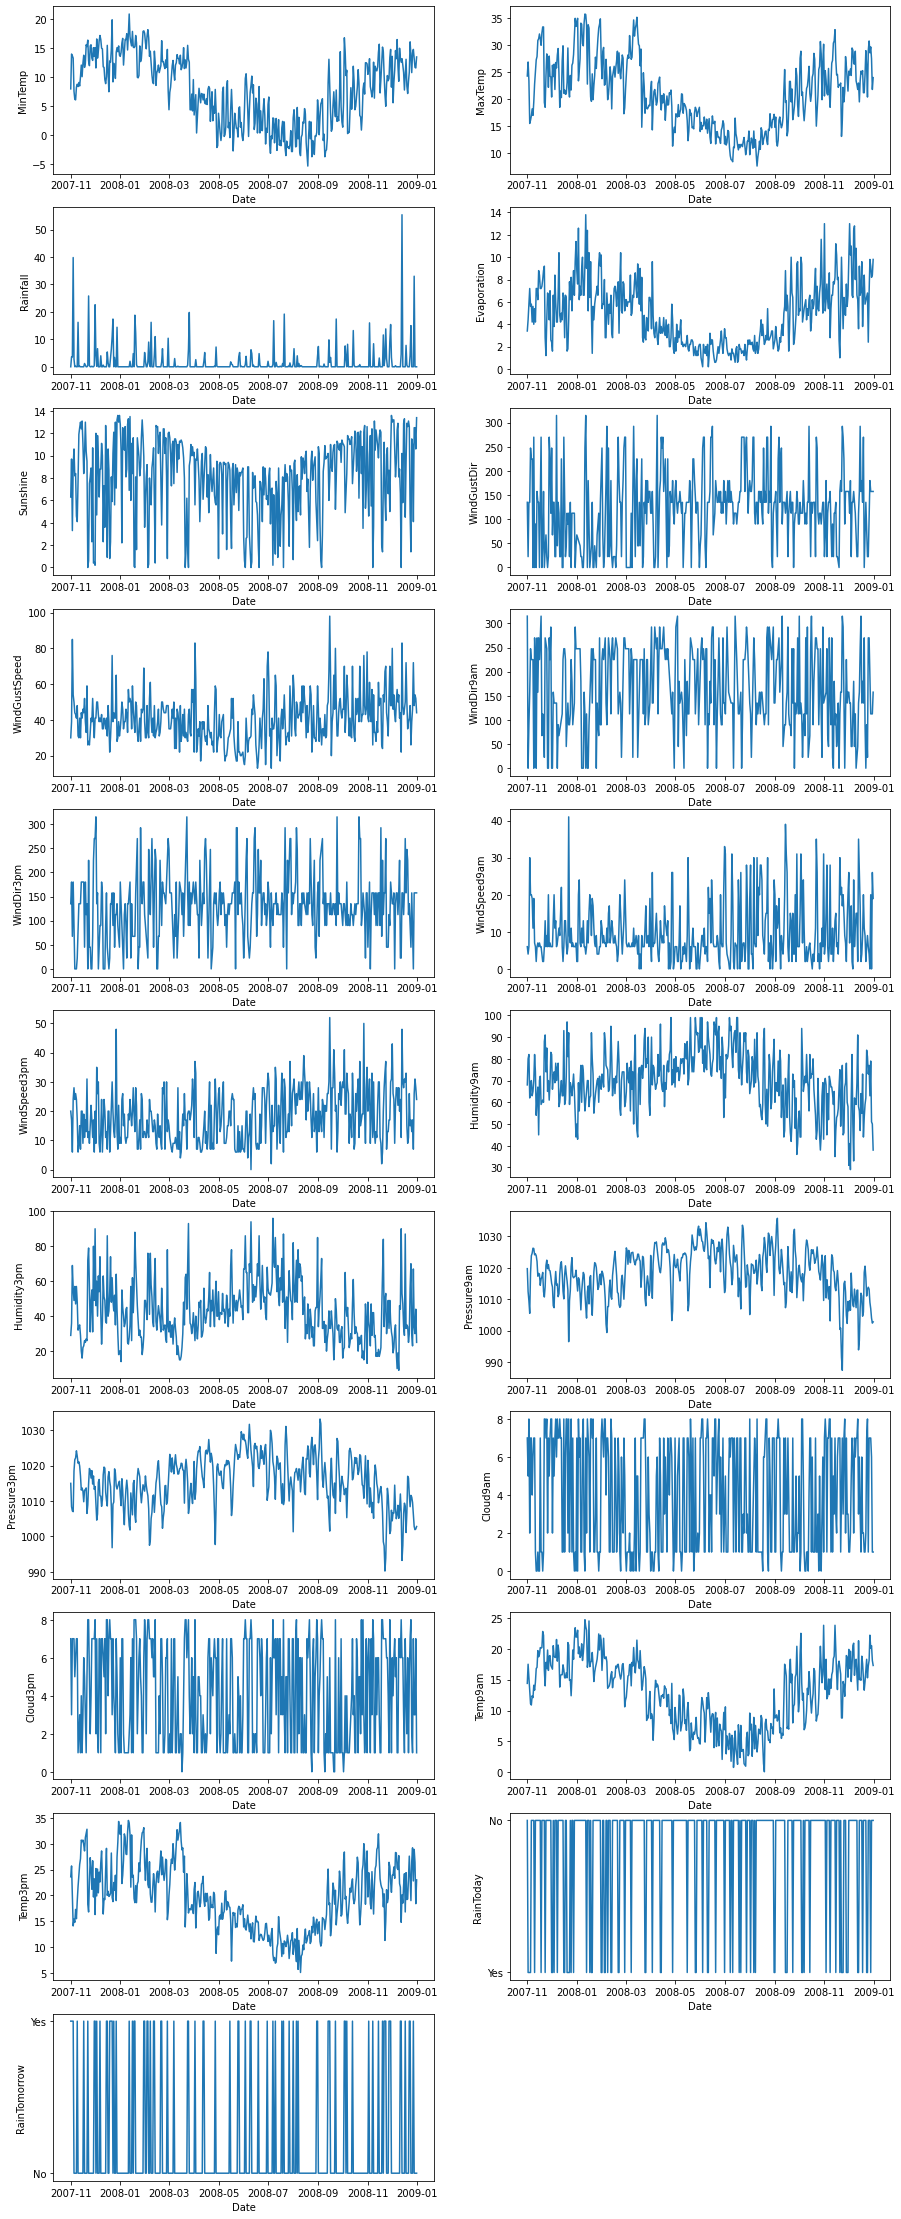

In [14]:
df_canberra = df[(df["Location"] == "Canberra") & (df["Date"] < '2009-01-01')]

daily_interpolation_columns = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustDir",
                               "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm",
                               "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am",
                               "Cloud3pm", "Temp9am", "Temp3pm", "RainToday", "RainTomorrow"]

plt.figure(figsize=(15, 40))
for i in range(len(daily_interpolation_columns)):
    plt.subplot(11,2, i+1)
    sns.lineplot(x=df_canberra["Date"], y=df_canberra[daily_interpolation_columns[i]])

As we see, it looks that filling missing values with interpolation would be promising for some features, but not for all of them. We will do it only for "MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"

In [15]:
daily_interpolation_columns = ["MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am",
                              "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                              "Temp9am", "Temp3pm"]

for column in daily_interpolation_columns:
    df[column] = df[column].groupby(df["Location"]).apply(lambda group: group.rolling(window=7,min_periods=1,center=True).mean())

In [16]:
show_null_columns_values(df)

Total records in DataFrame: 142451
Records left if we drop ones with null values: 40085


{'Date': 0,
 'Location': 0,
 'MinTemp': 660,
 'MaxTemp': 607,
 'Rainfall': 3248,
 'Evaporation': 57278,
 'Sunshine': 65959,
 'WindGustDir': 26301,
 'WindGustSpeed': 7936,
 'WindDir9am': 24787,
 'WindDir3pm': 21771,
 'WindSpeed9am': 693,
 'WindSpeed3pm': 2060,
 'Humidity9am': 1183,
 'Humidity3pm': 3235,
 'Pressure9am': 14586,
 'Pressure3pm': 14582,
 'Cloud9am': 55476,
 'Cloud3pm': 58839,
 'Temp9am': 617,
 'Temp3pm': 2671,
 'RainToday': 3248,
 'RainTomorrow': 3254,
 'latitude': 0,
 'longitude': 0}

We still have a lot of missing values for "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm". The interpolation did not help much with them, so we will just drop those features for now

In [17]:
df = df.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)

In [18]:
show_null_columns_values(df)

Total records in DataFrame: 142451
Records left if we drop ones with null values: 79167


{'Date': 0,
 'Location': 0,
 'MinTemp': 660,
 'MaxTemp': 607,
 'Rainfall': 3248,
 'WindGustDir': 26301,
 'WindGustSpeed': 7936,
 'WindDir9am': 24787,
 'WindDir3pm': 21771,
 'WindSpeed9am': 693,
 'WindSpeed3pm': 2060,
 'Humidity9am': 1183,
 'Humidity3pm': 3235,
 'Pressure9am': 14586,
 'Pressure3pm': 14582,
 'Temp9am': 617,
 'Temp3pm': 2671,
 'RainToday': 3248,
 'RainTomorrow': 3254,
 'latitude': 0,
 'longitude': 0}

We will also try to interpolate the wind direction features, but we will also revert back to null the records in which the filled value differs a lot from the value in the previous record

In [19]:
for column in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
        rows_to_fill = df[column].isna()
        df[column] = df[column].groupby(df['Location']).apply(lambda group: group.interpolate(limit=1))
        df.loc[rows_to_fill & (np.abs(df[rows_to_fill][column] - df[rows_to_fill][column].shift(-1)) >= 90), column] = None

In [20]:
show_null_columns_values(df)

Total records in DataFrame: 142451
Records left if we drop ones with null values: 99268


{'Date': 0,
 'Location': 0,
 'MinTemp': 660,
 'MaxTemp': 607,
 'Rainfall': 3248,
 'WindGustDir': 16077,
 'WindGustSpeed': 7936,
 'WindDir9am': 12041,
 'WindDir3pm': 10647,
 'WindSpeed9am': 693,
 'WindSpeed3pm': 2060,
 'Humidity9am': 1183,
 'Humidity3pm': 3235,
 'Pressure9am': 14586,
 'Pressure3pm': 14582,
 'Temp9am': 617,
 'Temp3pm': 2671,
 'RainToday': 3248,
 'RainTomorrow': 3254,
 'latitude': 0,
 'longitude': 0}

In [21]:
df = df.dropna().drop_duplicates()

In [22]:
show_null_columns_values(df)

Total records in DataFrame: 99268
Records left if we drop ones with null values: 99268


{'Date': 0,
 'Location': 0,
 'MinTemp': 0,
 'MaxTemp': 0,
 'Rainfall': 0,
 'WindGustDir': 0,
 'WindGustSpeed': 0,
 'WindDir9am': 0,
 'WindDir3pm': 0,
 'WindSpeed9am': 0,
 'WindSpeed3pm': 0,
 'Humidity9am': 0,
 'Humidity3pm': 0,
 'Pressure9am': 0,
 'Pressure3pm': 0,
 'Temp9am': 0,
 'Temp3pm': 0,
 'RainToday': 0,
 'RainTomorrow': 0,
 'latitude': 0,
 'longitude': 0}

We saved about 60k records! We have about 100k records, which can be split into train, test and validation datasets

In [23]:
df.to_csv("./data/weatherAUS_clean.csv", index=False)

In [27]:
df["RainTomorrow"].value_counts()

No     77246
Yes    22022
Name: RainTomorrow, dtype: int64